<a href="https://colab.research.google.com/github/PyAshishMhatre/Channel-Analysis-using-Youtube-Data-API/blob/Masking/YoutubeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 

analyzing top 8 tech Youtube channels for understanding how they are performing, what are the underlying trends and insights, performing a compitetor analysis also trying to answer what factors play in audience engagement and views. 

# Import Dependencies


In [237]:
import pandas as pd #Importing Pandas for data manipulation
import seaborn as sns #Importing seaborn for visualation
import numpy as np #Importing numpy for array operations
import datetime as dt #Importing datetime for date manipulation
from matplotlib import pyplot as plt #Importing pyplot from matplotlib for visualization
import warnings #Importing warnings to supress warnings in output
warnings.filterwarnings('ignore')

# Load Dataset 

In [146]:
channeldf = pd.read_csv('/content/ChannelData.csv', index_col='Unnamed: 0')

# Working on Channel Data 

Details on columns 
1. Channel_name - Title of Youtube Channel
2. Channel_Created - Date of Channel account created
3. Channel_country - Country where channel was created 
4. Channel_viewcount - Total views accumulated on channnel till '16-Jan-2022'
5. Channel_subcount - Total Subscriber count of channel till '16-Jan-2022'
6. Channel_vidcount - Total number of video uploaded on channel till '16-Jan-2022'

In [147]:
channeldf.head()

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Marques Brownlee,2008-03-21T15:25:54Z,US,UUBJycsmduvYEL83R_U4JriQ,2855578687,15200000,1410
1,Linus Tech Tips,2008-11-25T00:46:52Z,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,5425641560,14300000,5614
2,Austin Evans,2007-08-05T01:39:45Z,US,UUXGgrKt94gR6lmN4aN3mYTg,1183104884,5220000,1788
3,UrAvgConsumer,2012-01-01T23:54:16Z,US,UU9fSZHEh6XsRpX-xJc6lT3A,453544303,3160000,1005
4,Mrwhosetheboss,2011-04-20T12:10:24Z,GB,UUMiJRAwDNSNzuYeN2uWa0pA,1491243523,9640000,1399


In [148]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Channel_name       8 non-null      object
 1   Channel_Created    8 non-null      object
 2   Channel_country    7 non-null      object
 3   Channel_uploads    8 non-null      object
 4   Channel_viewcount  8 non-null      int64 
 5   Channel_subcount   8 non-null      int64 
 6   Channel_vidcount   8 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 512.0+ bytes


Convert Date column from UTC format to MM/DD/YY format 

In [149]:
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])
channeldf['Channel_Created'] = channeldf['Channel_Created'].dt.strftime('%m/%d/%Y')
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])

In [150]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Channel_name       8 non-null      object        
 1   Channel_Created    8 non-null      datetime64[ns]
 2   Channel_country    7 non-null      object        
 3   Channel_uploads    8 non-null      object        
 4   Channel_viewcount  8 non-null      int64         
 5   Channel_subcount   8 non-null      int64         
 6   Channel_vidcount   8 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 512.0+ bytes


In [151]:
channeldf

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Marques Brownlee,2008-03-21,US,UUBJycsmduvYEL83R_U4JriQ,2855578687,15200000,1410
1,Linus Tech Tips,2008-11-25,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,5425641560,14300000,5614
2,Austin Evans,2007-08-05,US,UUXGgrKt94gR6lmN4aN3mYTg,1183104884,5220000,1788
3,UrAvgConsumer,2012-01-01,US,UU9fSZHEh6XsRpX-xJc6lT3A,453544303,3160000,1005
4,Mrwhosetheboss,2011-04-20,GB,UUMiJRAwDNSNzuYeN2uWa0pA,1491243523,9640000,1399
5,Dave2D,2015-01-05,CA,UUVYamHliCI9rw1tHR1xbkfw,664653933,3480000,642
6,Unbox Therapy,2010-12-21,NaN,UUsTcErHg8oDvUnTzoqsYeNw,4228241509,18200000,2004
7,Technical Guruji,2015-10-19,IN,UUOhHO2ICt0ti9KAh-QHvttQ,2914231863,21900000,4229


#View count comparsion

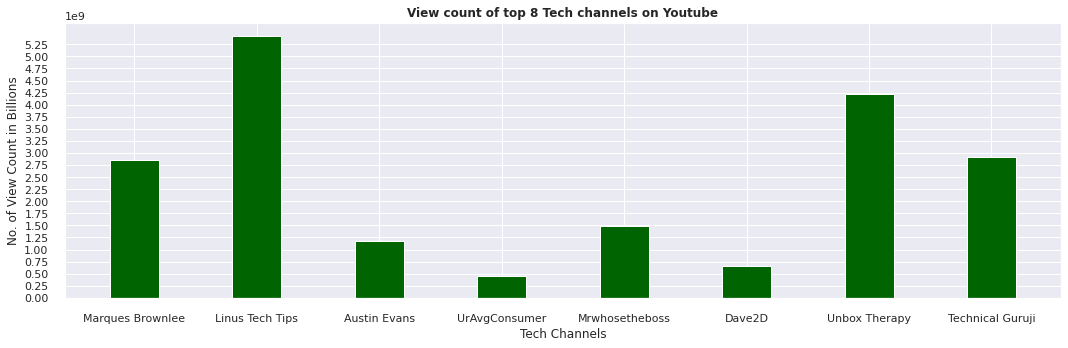

In [152]:
fig, ax = plt.subplots(figsize =(15, 5))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_viewcount'], color ='darkgreen',
        width = 0.4,)
step_value = 250000000
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of View Count in Billions")
plt.title("View count of top 8 Tech channels on Youtube" , fontdict= { 'fontweight' : 'bold'})
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

 We can see that among the other channels 'Linus Tech Tips' has the highest views accumulated with a total views greater than five billion. 

#Subscriber base % compared to each other

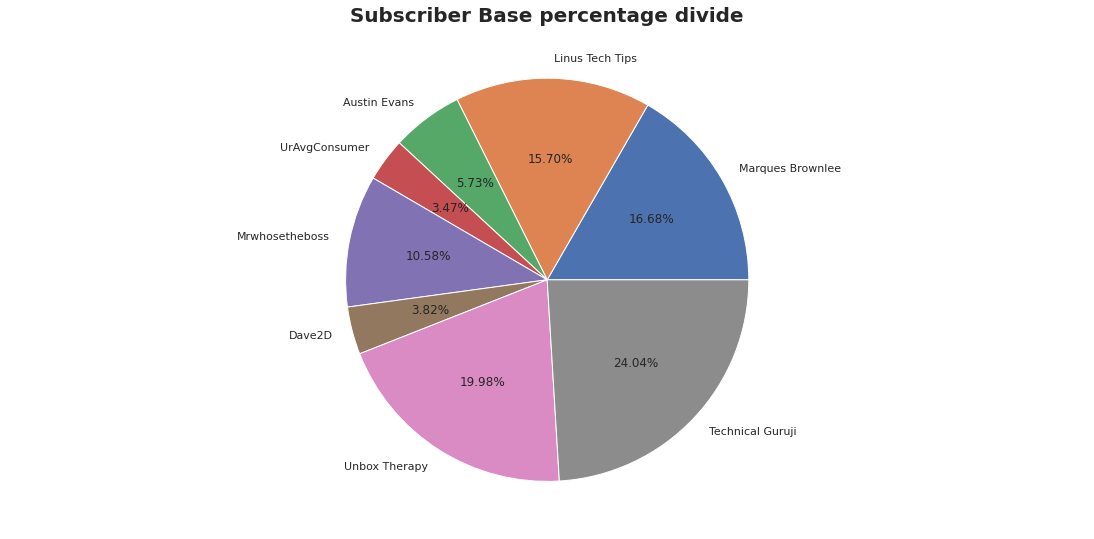

In [240]:
fig = plt.figure(figsize =(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(channeldf['Channel_subcount'], labels = channeldf['Channel_name'],autopct='%1.2f%%')
ax.set_title('Subscriber Base percentage divide', fontdict={'fontsize' : 20, 'fontweight':'bold'})
plt.show()

 With 24.04% "Technical Guruji" channel has the highest subscriber count compared to other channels, followed by "Unbox Therapy" and "Marques Brownlee"

Its intresting to see that even though "Linus Tech Tips" have 34.70% less subscriber than "Technical Guruji" it still has the highest no. of view count followed by "Unbox Therapy" which can be justified seeing a subscriber percentage share of almost 20% compared with others.

#Total number of videos uploaded on channel

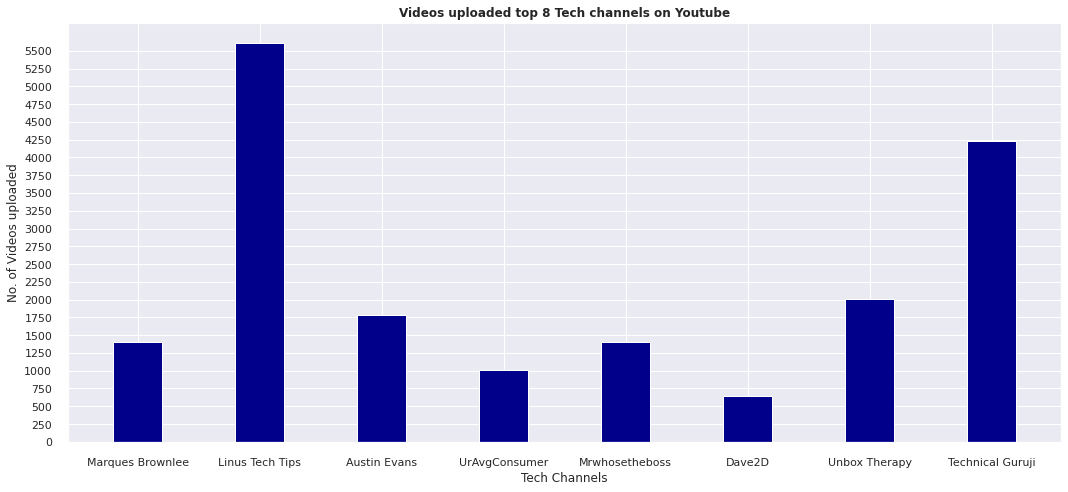

In [154]:
fig, ax = plt.subplots(figsize =(15, 7))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_vidcount'], color ='darkblue',
        width = 0.4,)
step_value = 250
plt.yticks(np.arange(0, max(channeldf['Channel_vidcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of Videos uploaded")
plt.title("Videos uploaded top 8 Tech channels on Youtube" , fontdict= { 'fontweight' : 'bold'})
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

"Linus Tech Tips" leads the total number of uploads made followed by "Technical Guruji". 

Does Higher no. of uploads with equally high subscriber count leads to higher view count ? 

#Relationship between channel subscriber count and View count with total video count as hue parameter

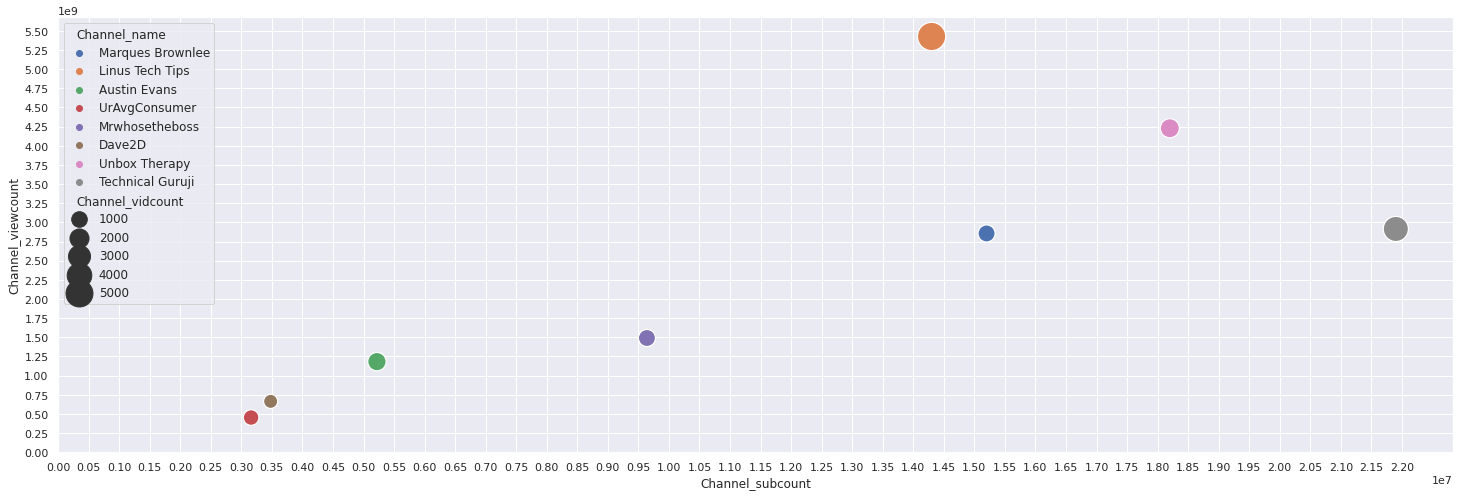

In [155]:
fig, ax = plt.subplots(figsize =(25, 8))
sns.set_style("darkgrid")
sns.scatterplot(data=channeldf, x=channeldf['Channel_subcount'], y=channeldf['Channel_viewcount'], size= channeldf['Channel_vidcount'], hue=channeldf['Channel_name'], alpha=1, sizes=(200,800))
step_value = 500000
step = 250000000
plt.xticks(np.arange(0, max(channeldf['Channel_subcount']) + step_value, step_value))
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']) + step, step))
# show the graph
plt.show()

Scatterplots are useful for interpreting trends in statistical data. The above figure shows a scatterplot for Subscriber count, View count and Upload count as size parameter. We can observe a positive linear relationship between the 3 variables.

indicating a increase in subscriber count has a higher chance of increase in view count, while we can also see "Linus Tech Tips" does not follow the trend with higher than average upload nos. resulting a higher view count for a relatively less subscriber count.

additionally, "Technical Guruji" shows a decline in view count as compared to highest subcriber base.

conclusion - Scatterplots shows a possible associations or relationships between the three variables, but doesn’t mean that a cause-and-effect relationship exists as we have a limited data in culamative format.

#Finding Correlation between Subcriber Count, View Count & Total Video Count

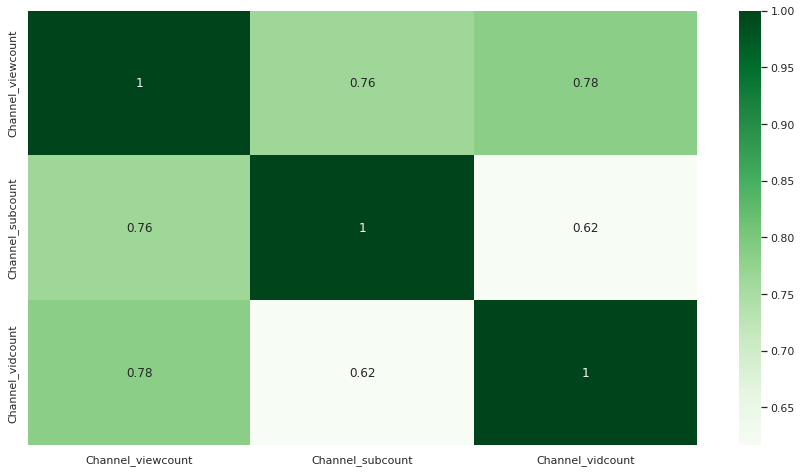

In [241]:

fig, ax = plt.subplots(figsize =(15, 8))
corr_matrix=channeldf.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='Greens', annot=True)
plt.show()

By displaying a heatmap on correlation matrix we can see that Channel View count is more correlated to Channel video upload with 0.78 coefficient. while having 0.76 correlation coefficient for Channel Views and Channel Subscriber count. The data here can be skewed towards video uploads due high number of video uploads made from "Linus Tech Tips"

# Working on Video Details

In [157]:
videodf = pd.read_csv('/content/VideoDetails.csv',index_col='Unnamed: 0')


In [158]:
videodf.head()


,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,tqaVPn4YFaY,2022-01-16T16:29:45Z,Unbox Therapy,My Tesla Model S Plaid has arrived. What a tim...,0
1,Es1Uolu0chc,2022-01-15T18:07:18Z,Unbox Therapy,Huawei is finally back in the studio with some...,1
2,xXpWulEEhGw,2022-01-10T17:45:16Z,Unbox Therapy,This is the new ASUS ROG Flow Z13 it packs RTX...,2
3,JpV0KHGqn_w,2022-01-07T03:20:05Z,Unbox Therapy,Unboxing the new Realme GT 2 Pro and checking ...,3
4,9zQq-3Kn0uM,2021-12-31T20:22:33Z,Unbox Therapy,Please see below for contest details: (open to...,4


#Type conversion

In [159]:
videodf['Video_published_date'] = pd.to_datetime(videodf['Video_published_date'])

In [160]:
videodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18282 entries, 0 to 18281
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Video_id              18282 non-null  object             
 1   Video_published_date  18282 non-null  datetime64[ns, UTC]
 2   Channel_name          18282 non-null  object             
 3   Video_description     18272 non-null  object             
 4   Video_position        18282 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 857.0+ KB


Updated Datetime type

In [161]:
videodf.head()

,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,tqaVPn4YFaY,2022-01-16 16:29:45+00:00,Unbox Therapy,My Tesla Model S Plaid has arrived. What a tim...,0
1,Es1Uolu0chc,2022-01-15 18:07:18+00:00,Unbox Therapy,Huawei is finally back in the studio with some...,1
2,xXpWulEEhGw,2022-01-10 17:45:16+00:00,Unbox Therapy,This is the new ASUS ROG Flow Z13 it packs RTX...,2
3,JpV0KHGqn_w,2022-01-07 03:20:05+00:00,Unbox Therapy,Unboxing the new Realme GT 2 Pro and checking ...,3
4,9zQq-3Kn0uM,2021-12-31 20:22:33+00:00,Unbox Therapy,Please see below for contest details: (open to...,4


#Group by year
Group count of videos uploaded each year for respective Youtube channel

In [162]:
def aggyear(colname):
  plotdata = videodf[videodf['Channel_name'] == colname]
  plotdata['Video_published_date'] = plotdata['Video_published_date'].dt.year
  plotdata = plotdata.groupby('Video_published_date').count()
  plotdata.drop(index=2022, inplace=True)
  return(plotdata.index,plotdata['Video_id'],plotdata)

#Using line graph--subplots to display all channel upload frequency by years

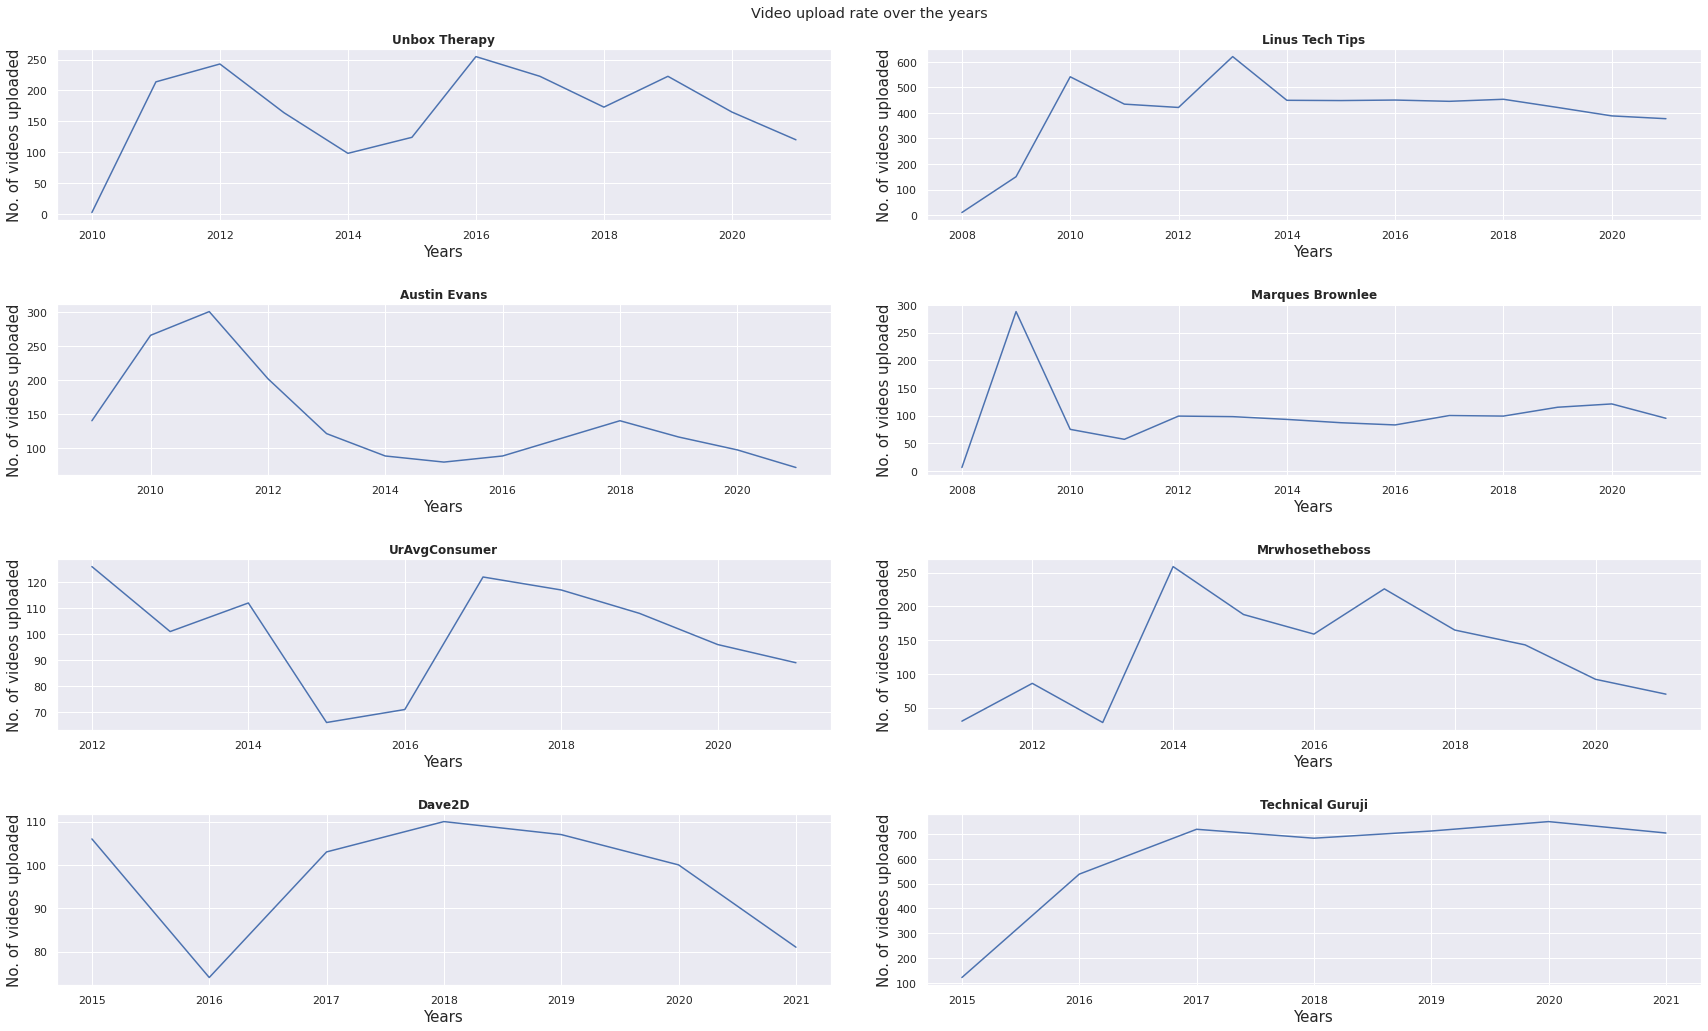

In [169]:
fig, axes = plt.subplots(4, 2, figsize=(25, 15))
sns.set_theme(style="darkgrid")
fig.tight_layout(pad=5.0)
fig.suptitle('Video upload rate over the years', fontdict= { 'fontsize': 20 })


X,Y,plotdata = aggyear('Unbox Therapy')
l = sns.lineplot(ax=axes[0, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[0][0].set_title('Unbox Therapy', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Linus Tech Tips')
l= sns.lineplot(ax=axes[0, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[0][1].set_title('Linus Tech Tips', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Austin Evans')
l= sns.lineplot(ax=axes[1, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[1][0].set_title('Austin Evans', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Marques Brownlee')
l=sns.lineplot(ax=axes[1, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[1][1].set_title('Marques Brownlee', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('UrAvgConsumer')
l=sns.lineplot(ax=axes[2, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[2][0].set_title('UrAvgConsumer', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Mrwhosetheboss')
l=sns.lineplot(ax=axes[2, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[2][1].set_title('Mrwhosetheboss', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Dave2D')
l=sns.lineplot(ax=axes[3, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[3][0].set_title('Dave2D', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Technical Guruji')
l=sns.lineplot(ax=axes[3, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[3][1].set_title('Technical Guruji', fontdict = {'fontweight' : 'bold'})
plt.show()

#Working with Video Statistics

In [170]:
stats = pd.read_csv('/content/VideoStatistics.csv',index_col='Video_id')
stats.drop(columns='Unnamed: 0', inplace = True)

In [171]:
stats.head()

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
tqaVPn4YFaY,Unbox Therapy,3292.0,0,28270.0,770804.0
Es1Uolu0chc,Unbox Therapy,2320.0,0,19927.0,1255720.0
xXpWulEEhGw,Unbox Therapy,1911.0,0,19447.0,1495515.0
JpV0KHGqn_w,Unbox Therapy,3875.0,0,37793.0,2668559.0
9zQq-3Kn0uM,Unbox Therapy,453.0,0,4528.0,1227592.0


In [172]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18282 entries, tqaVPn4YFaY to M_QU_Y93eLc
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Video_Channel_title  18282 non-null  object 
 1   Stats_Comment        18257 non-null  float64
 2   Stats_Fav            18282 non-null  int64  
 3   Stats_Like           18264 non-null  float64
 4   Stats_view           18270 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 857.0+ KB


In [173]:
stats.isnull().sum()

Video_Channel_title     0
Stats_Comment          25
Stats_Fav               0
Stats_Like             18
Stats_view             12
dtype: int64

In [174]:
stats[stats['Stats_Comment'].isnull()]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
IjrkRZBwboM,Unbox Therapy,NaN,0,36280.0,287713.0
_j5IYKxYN2I,Unbox Therapy,NaN,0,14108.0,88187.0
zgHURdLByjA,Unbox Therapy,NaN,0,2554.0,77164.0
WthlK86Un5c,Unbox Therapy,NaN,0,3972.0,198431.0
8syPkiANwYk,Marques Brownlee,NaN,0,104878.0,772888.0
TmikWdsrz_U,Marques Brownlee,NaN,0,43850.0,505162.0
R7siKvpvuCM,Marques Brownlee,NaN,0,34375.0,482524.0
TTWJq2MpCx4,Marques Brownlee,NaN,0,14833.0,143580.0
MQ97Kymd6X0,Marques Brownlee,NaN,0,4900.0,71556.0


In [175]:
#Fill null comments value with mean comment count
stats['Stats_Comment'].fillna(stats['Stats_Comment'].mean(), inplace = True)

#Handling the nulls with 'Likes' and 'View' in similar method
stats['Stats_Like'].fillna(stats['Stats_Like'].mean(), inplace = True)

stats['Stats_view'].fillna(stats['Stats_view'].mean(), inplace = True)



In [176]:
stats.isnull().sum()

Video_Channel_title    0
Stats_Comment          0
Stats_Fav              0
Stats_Like             0
Stats_view             0
dtype: int64

In [177]:
stats['Stats_Comment'] = stats['Stats_Comment'].astype(np.int64)
stats['Stats_Like'] = stats['Stats_Like'].astype(np.int64)
stats['Stats_view'] = stats['Stats_view'].astype(np.int64)

In [178]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18282 entries, tqaVPn4YFaY to M_QU_Y93eLc
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Video_Channel_title  18282 non-null  object
 1   Stats_Comment        18282 non-null  int64 
 2   Stats_Fav            18282 non-null  int64 
 3   Stats_Like           18282 non-null  int64 
 4   Stats_view           18282 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 857.0+ KB


In [179]:
stats

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
tqaVPn4YFaY,Unbox Therapy,3292,0,28270,770804
Es1Uolu0chc,Unbox Therapy,2320,0,19927,1255720
xXpWulEEhGw,Unbox Therapy,1911,0,19447,1495515
JpV0KHGqn_w,Unbox Therapy,3875,0,37793,2668559
9zQq-3Kn0uM,Unbox Therapy,453,0,4528,1227592
...,...,...,...,...,...
wmEgqm4goWQ,Mrwhosetheboss,129,0,806,28767
3OqhMclB2QI,Mrwhosetheboss,290,0,1475,33728
8lP7i_CcRVg,Mrwhosetheboss,177,0,765,47432


#Channel Having Most Comments, Likes and Views on a Video

In [180]:
group = stats.groupby(by='Video_Channel_title').max()

In [181]:
group

,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_Channel_title,,,,
Austin Evans,54641,0,396804,24109452
Dave2D,26313,0,336342,30820731
Linus Tech Tips,226781,0,506653,20753756
Marques Brownlee,340207,0,654401,33686783
Mrwhosetheboss,280473,0,918771,23785983
Technical Guruji,799663,0,2097566,17780805
Unbox Therapy,1674945,0,418054,73495719
UrAvgConsumer,72105,0,158120,8513830


Text(0, 0.5, 'No. of comments')

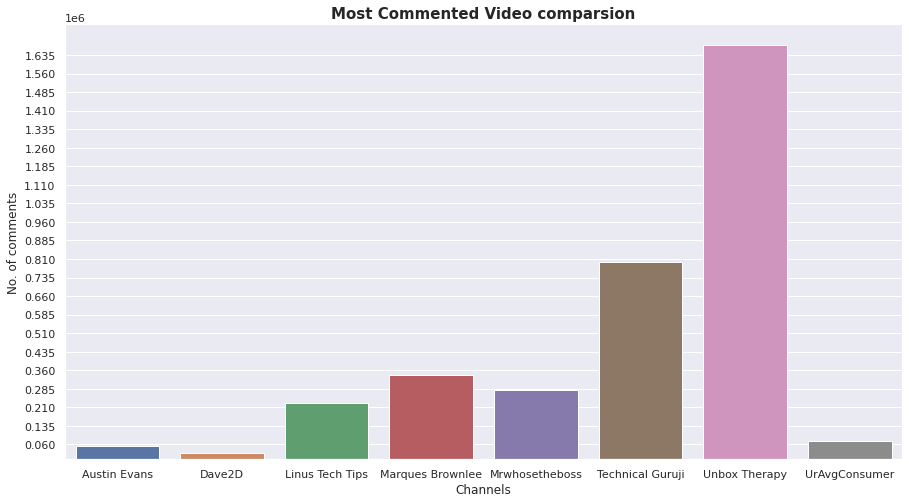

In [182]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_Comment', data=group)
step_value = 75000
bar.set_yticks(np.arange(60000, 1674945, step_value))
bar.set_title('Most Commented Video comparsion', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Channels')
bar.set_ylabel('No. of comments')

Text(0, 0.5, 'No. of Likes')

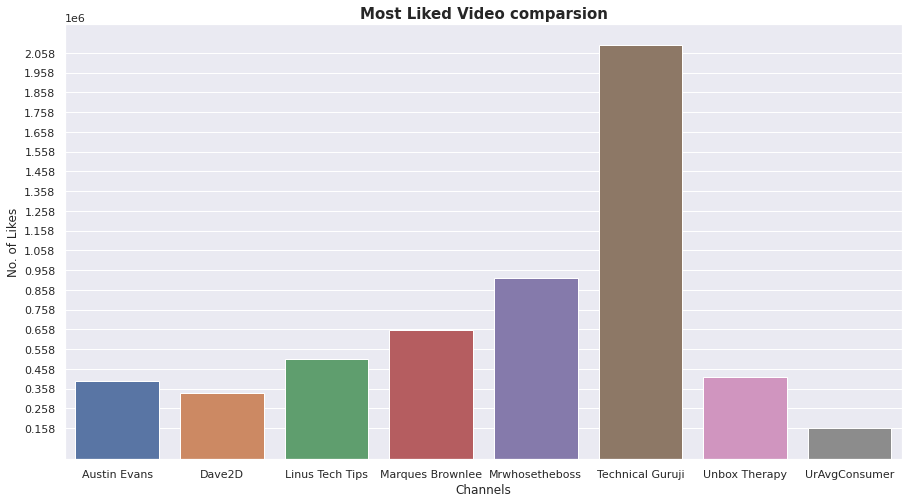

In [183]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_Like', data=group)
step_value = 100000
bar.set_yticks(np.arange(158120, 2097566, step_value))
bar.set_title('Most Liked Video comparsion', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Channels')
bar.set_ylabel('No. of Likes')

Text(0, 0.5, 'No. of Views')

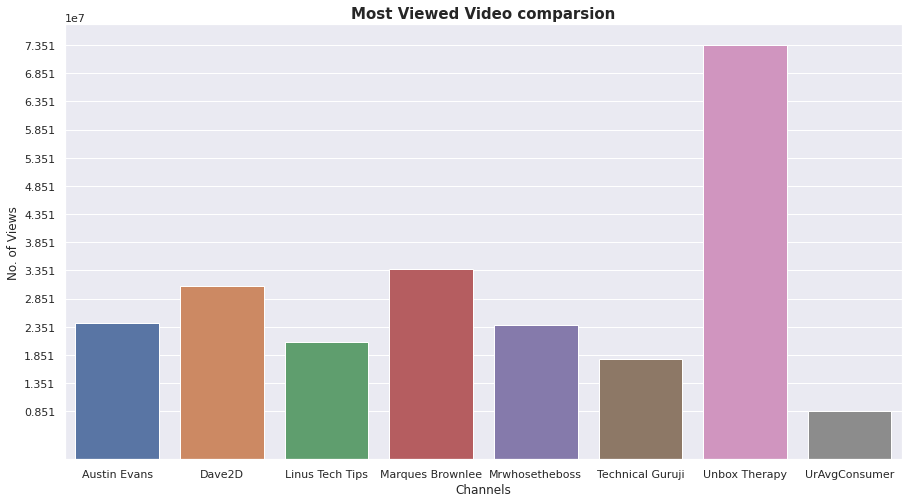

In [184]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_view', data=group)
step_value = 5000000
bar.set_yticks(np.arange(8513830, 74495719, step_value))
bar.set_title('Most Viewed Video comparsion' , fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Channels')
bar.set_ylabel('No. of Views')

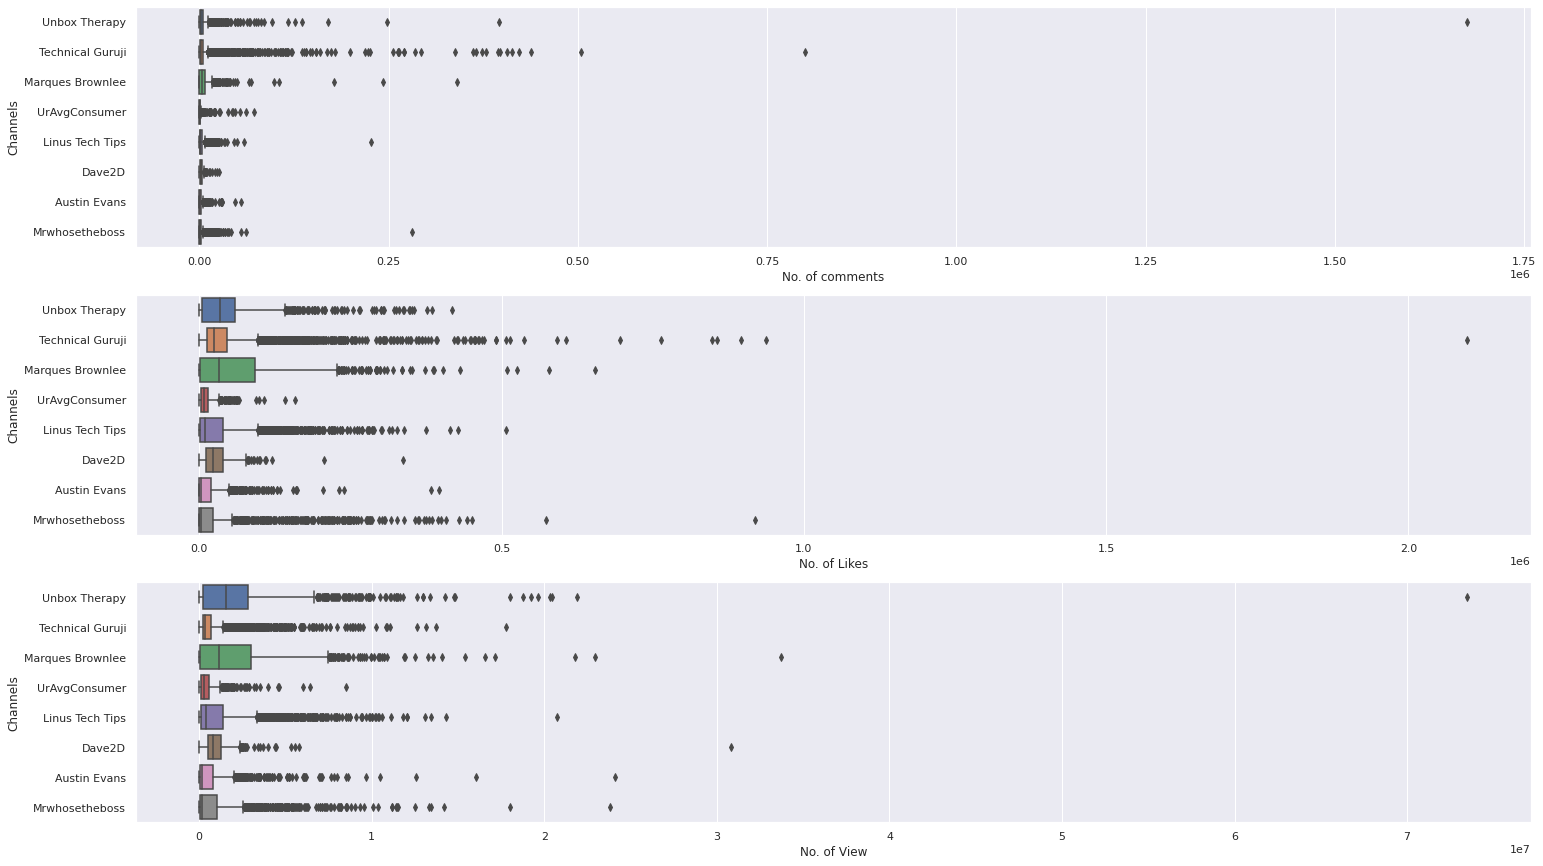

In [185]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))

b = sns.boxplot(x=stats['Stats_Comment'], y=stats['Video_Channel_title'], ax=axes[0])
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_Like'], y=stats['Video_Channel_title'],    ax=axes[1])
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_view'], y=stats['Video_Channel_title'],    ax=axes[2])
b.set_xlabel('No. of View')
b.set_ylabel('Channels')
plt.show()

#Handling outliers 

Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

In [186]:
stats.Stats_Comment.describe().apply(lambda x: format(x, '.2f'))

count      18282.00
mean        4463.07
std        20926.38
min            3.00
25%          437.25
50%         1645.00
75%         4015.00
max      1674945.00
Name: Stats_Comment, dtype: object

#Identifying outliers with the "1.5xIQR rule"

A commonly used rule says that a data point is an outlier if it is more than 1.5 x IQR, above the third quartile or below the first quartile.

* Low outliers --->  Q1 - 1.5 x IQR

* High outliers ---> Q3 + 1.5 x IQR

In [187]:
def BoxLimits(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    L_limit = Q1 - (1.5 * IQR)
    U_limit = Q3 + (1.5 * IQR)
    u = max(x[x<U_limit])
    l = min(x[x>L_limit])
    return [u,l]

#

In [188]:
def remove(col):
  outlier = []
  df = stats.copy()
  flag = True
  while flag:

    for channels in stats['Video_Channel_title'].unique():
      channel = df[df['Video_Channel_title'] == channels]
      u,l = BoxLimits(channel[col])
      outlier.extend(channel[(channel[col] < l) | (channel[col] > u) ].index)
    if len(outlier) > 0:
      df.drop(index = outlier, inplace = True)
      outlier = []
    else:
      flag = False
  return df
  

In [189]:
comments = remove('Stats_Comment')

In [190]:
comments.shape

(15062, 5)

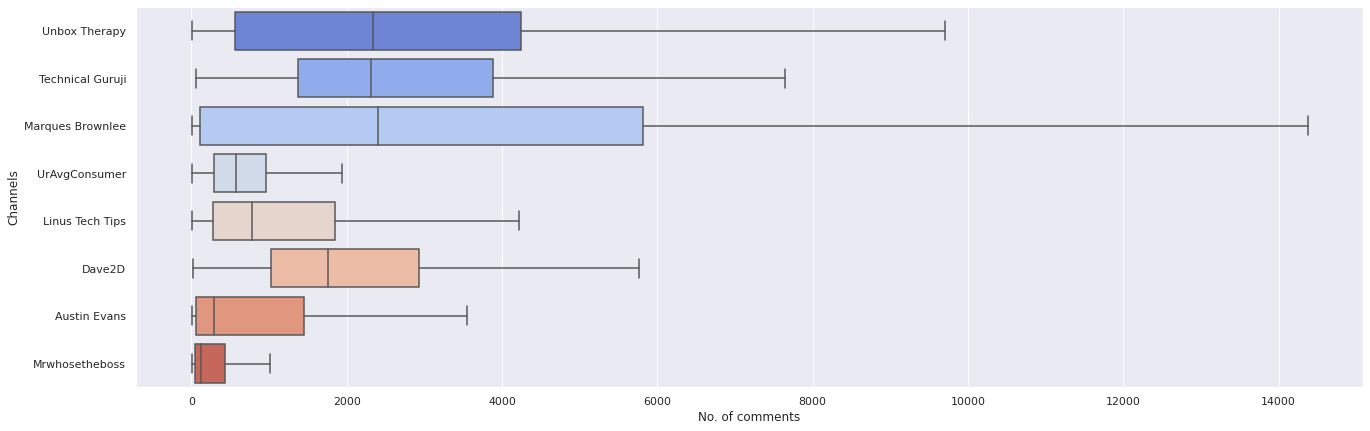

In [191]:
fig = plt.figure(figsize=(22, 7))

b = sns.boxplot(x=comments['Stats_Comment'], y=comments['Video_Channel_title'], palette='coolwarm')
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')

plt.show()

#Removing only Likes Outliers

In [192]:
Likes = remove('Stats_Like')

In [193]:
Likes.shape

(11763, 5)

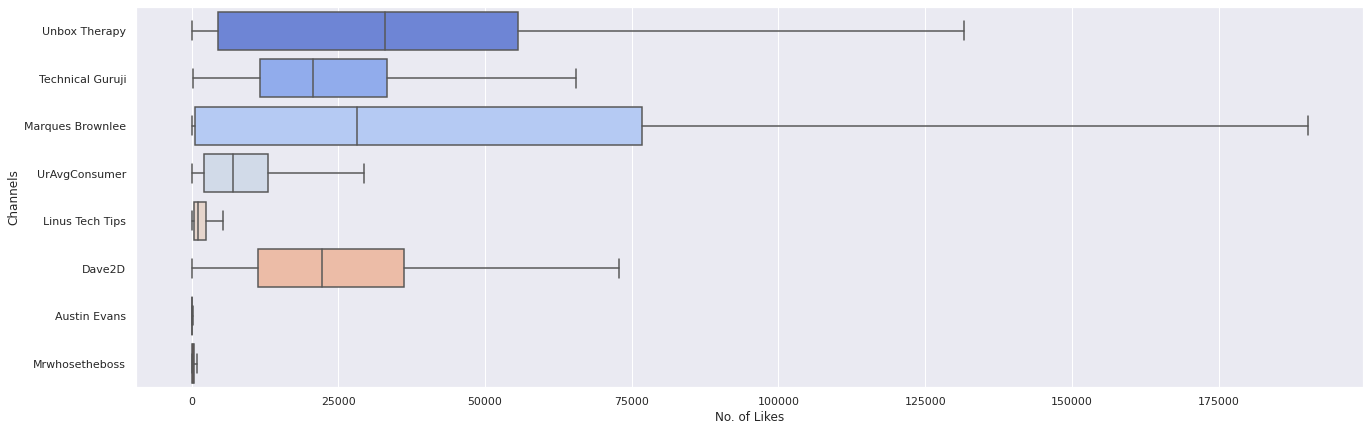

In [194]:
fig = plt.figure(figsize=(22, 7))

b = sns.boxplot(x=Likes['Stats_Like'], y=Likes['Video_Channel_title'], palette='coolwarm')
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')

plt.show()

#Removing only Views Outliers

In [195]:
Views = remove('Stats_view')

In [196]:
Views.shape

(13793, 5)

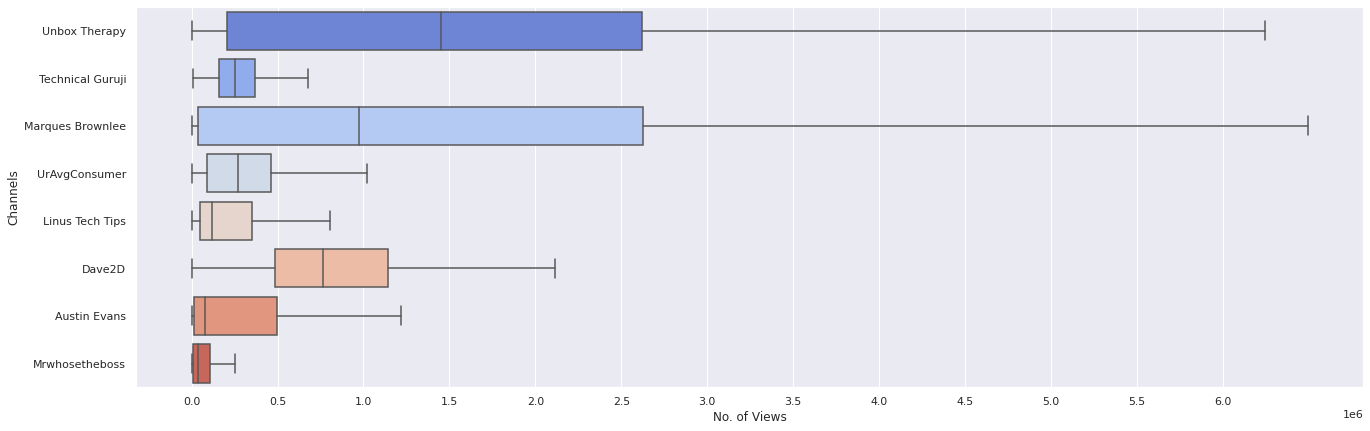

In [197]:
fig = plt.figure(figsize=(22, 7))

b = sns.boxplot(x=Views['Stats_view'], y=Views['Video_Channel_title'], palette='coolwarm')
step_value = 500000
b.set_xticks(np.arange(min(Views['Stats_view']), max(Views['Stats_view']), step_value))
b.set_xlabel('No. of Views')
b.set_ylabel('Channels')

plt.show()

#Comparsion of Average Comments, Likes & Views after removing outliers

In [198]:
group_comment = comments.groupby(by='Video_Channel_title').mean()
group_like = Likes.groupby(by='Video_Channel_title').mean()
group_view = Views.groupby(by='Video_Channel_title').mean()
group = stats.groupby(by='Video_Channel_title').mean()

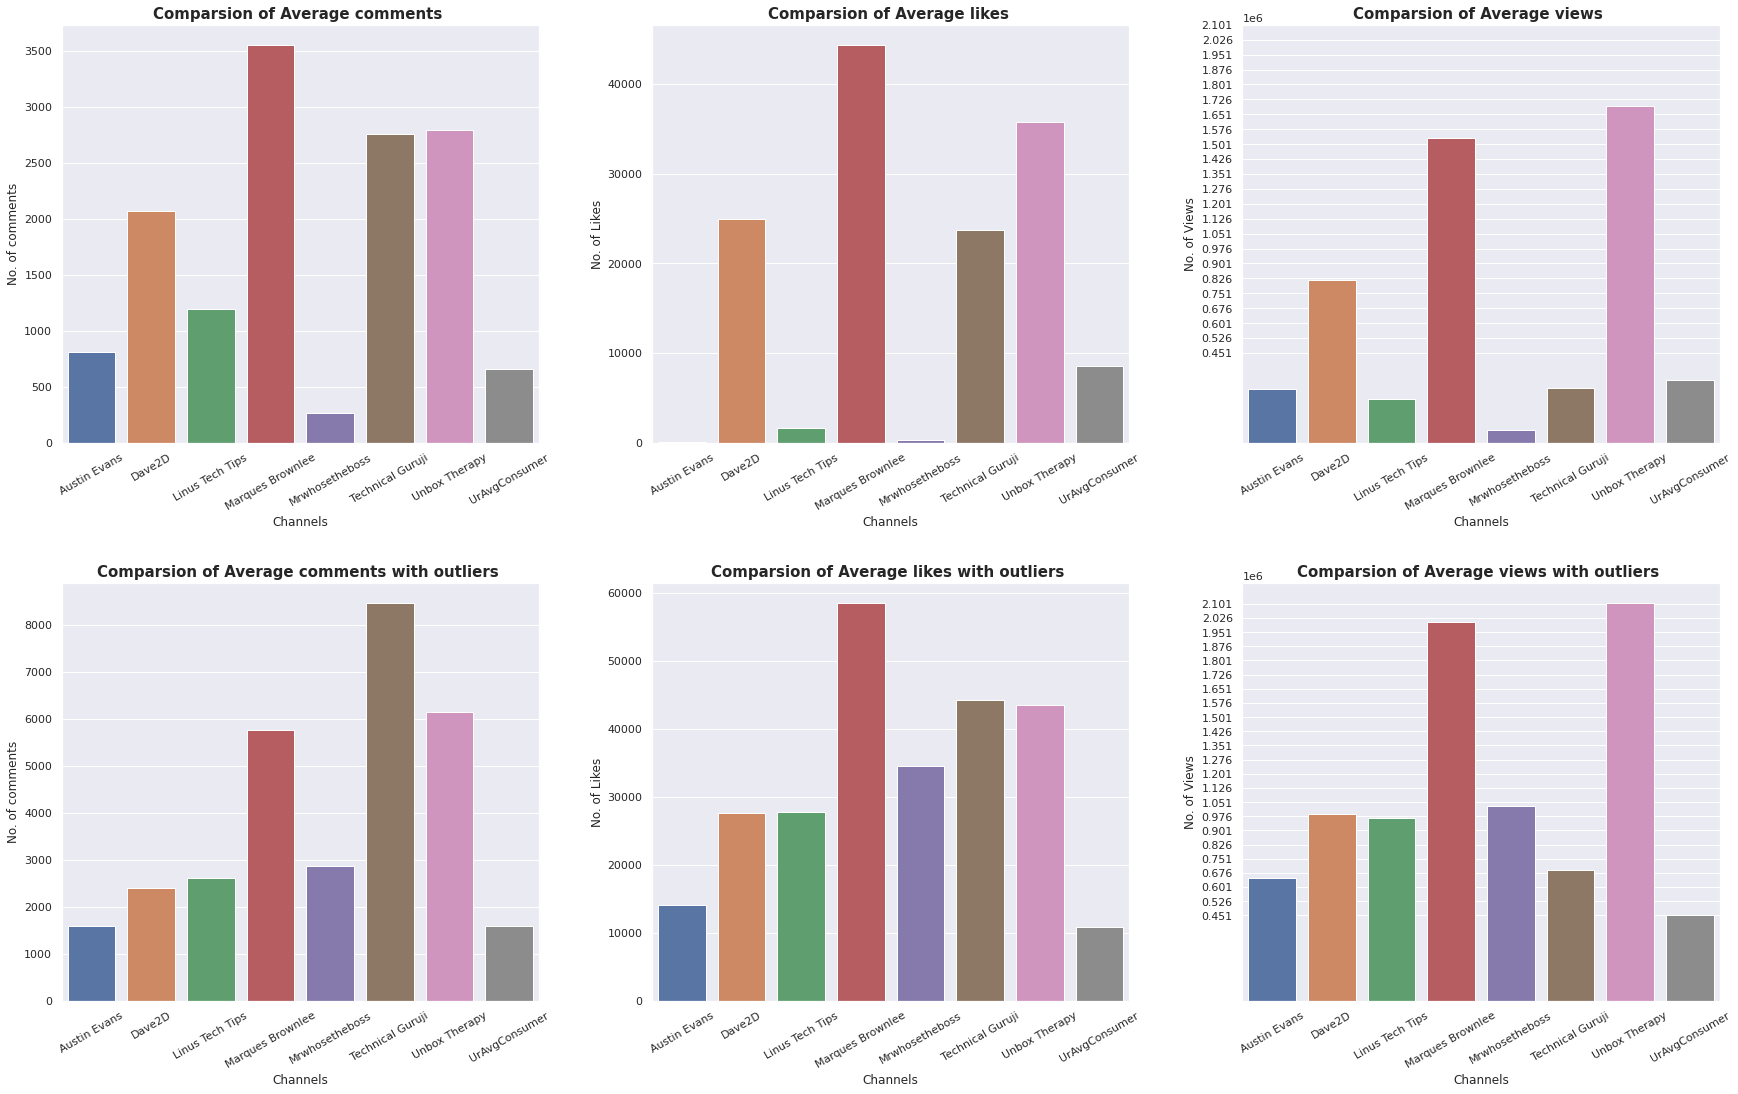

In [199]:
fig, axes = plt.subplots(2, 3, figsize=(25, 16))


b = sns.barplot(x= group_comment.index , y=group_comment['Stats_Comment'], ax=axes[0,0])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of comments')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average comments ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group_like.index , y=group_like['Stats_Like'], ax=axes[0,1])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Likes')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average likes ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group_view.index , y=group_view['Stats_view'], ax=axes[0,2])
step_value = 75000
b.set_yticks(np.arange(min(group['Stats_view']), max(group['Stats_view']), step_value))
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Views')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average views ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group.index , y=group['Stats_Comment'], ax=axes[1,0])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of comments')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average comments with outliers ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group.index , y=group['Stats_Like'], ax=axes[1,1])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Likes')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average likes with outliers ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group.index , y=group['Stats_view'], ax=axes[1,2])
step_value = 75000
b.set_yticks(np.arange(min(group['Stats_view']), max(group['Stats_view']), step_value))
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Views')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average views with outliers ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

fig.tight_layout(pad=3.0)
plt.show()

#Inference
> ### Average Comments
1.   We can see that Channel "Technical Guruji" has the highest average comments and "Unbox Therapy" being second when compared with other channels with outliers. 
2.   While in 1st bar plot without outliers we can see that channel "Marques Browniee" has the highest average, Technical guruji falls at no. 3 and "Unbox Therapy" maintains its stats and position,  these in turn means that tech videos of channel "Marques Browniee" receives on a average more no. comments compared to other tech channels which might receive high comments on some particular videos but not all. 
3. So we can say that it indicates the audience comment engagement received on Tech Channel "Marques Browniee" is more

> ### Average Likes
1. Comparing both charts showing average number of likes with and without outliers we can immediately see that channels 'Austin Evans', 'Linus Tech Tips' and 'Mrwhosetheboss' falls down considerably in graph without outliers suggesting only few hundreds or thousands of likes turn on in average on their tech videos, which raises concerns about the viewers perception of videos and viewers interaction.
2. other channels like "Marques Browniee", "Unbox Therapy", "Technical Guruji" and "Dave2D" maintain the shape of the bar between the two graphs with "Marques Browniee" enjoying highest no. of likes with and without outlier showing a positive viewer attraction and could also suggest that viewers Trust the content created by channel "Marques Browniee"

> ### Average Views
1. Channel "Technical Guruji", "Linus Tech Tips" and "Mrwhosetheboss" slides down the graph significantly when we remove the outliers, while rest of the channel's standing stays the same. 
2. When it comes to average views on each video uploaded, "Unbox Therapy" receives the highest average views followed by "Marques Browniee"
3. Observing average views on channel "Dave2D" in comparsion to the number of subscriber count and total no. of videos uploaded its safe to consider that viewers ranking and attraction for channel is highly positive. which states a strong social presence.












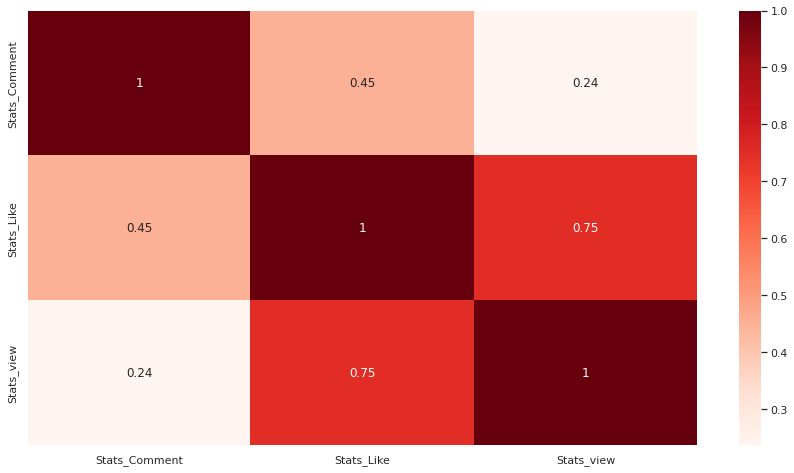

In [203]:
fig, ax = plt.subplots(figsize =(15, 8))
corr_matrix=stats.drop(columns='Stats_Fav').corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='Reds', annot=True)

#Merging Video Details with Video Statistics